In [1]:
import torch
from tqdm.auto import tqdm

from facade_project import NUM_IMAGES, NUM_ROTATIONS, FACADE_ROT_HEATMAPS_TENSORS_DIR, LABEL_NAME_TO_VALUE

In [2]:
from facade_project.data.facade_heatmap_dataset import HEATMAP_INFOS_PER_ROT
from facade_project.geometry.heatmap import build_heatmaps
from facade_project.show import *

In [3]:
def get_filename(labels, idx, jdx):
    for l in labels:
        assert l in LABEL_NAME_TO_VALUE.keys()

    return '{}/heatmaps_{}_{:03d}_{:03d}.torch'.format(FACADE_ROT_HEATMAPS_TENSORS_DIR, '-'.join(sorted(labels)), idx, jdx)    

In [4]:
get_filename(['window', 'door'], 10, 4)

'/data/heatmaps/tensor/rotated_rescaled/heatmaps_door-window_010_004.torch'

In [5]:
def get_heatmap(idx, jdx):
    assert 0 <= idx < NUM_IMAGES
    assert 0 <= jdx < NUM_ROTATIONS
    return build_heatmaps(HEATMAP_INFOS_PER_ROT[idx][jdx], ['window', 'door'], heatmap_types=['center', 'width', 'height'])

torch.Size([1028, 3080, 3])


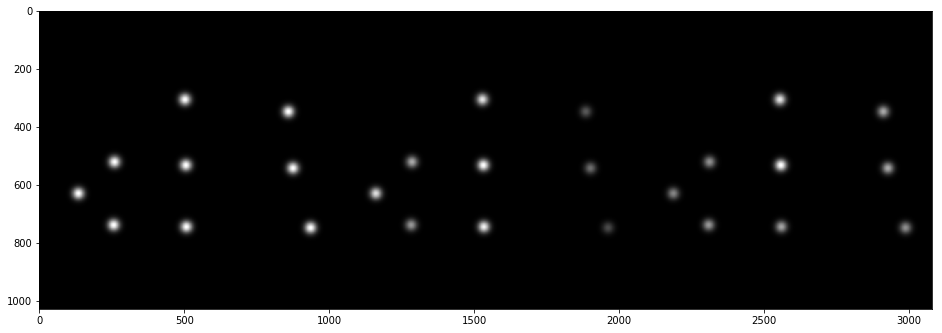

In [6]:
show_channels(get_heatmap(0, 0))

# Generate
Run this only to generate the heatmaps again (careful about overwriting old ones)

In [ ]:
for idx in tqdm(list(range(NUM_IMAGES))):
    for jdx in range(NUM_ROTATIONS):
        hmaps = get_heatmap(idx, jdx)
        fpath = get_filename(['window', 'door'], idx, jdx)
        torch.save(hmaps, fpath)